**Applied Empirical Analysis (HS 2020)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 5 - Mediation

***


Key ingredients for a mediation analysis:

* Treatment, intermediate outcomes and outcomes measured at different points in time.
* A good understanding of of all channels and potential confounders (i.e. institutionl knowledge, theory) and enough variables to control for that

## Application: Identifying causal mechanisms (primarily) based on inverse probability weighting

**Martin Huber, J. Appl. Econ. 2014**


***
## 1. Introduction


* What is the research question?

* Why is this question of interest?

* What is the treatment, the mediator, and the outcome(s) and when are they measured?

* How is the treatment assigned?

* Why can you not just regress the outcome on the mediator, i.e. what is the endogeneity problem? (2 points)


### Notation (different from application)

* treatment: $D=d\in\{0,1\}$ 
* intermediate outcome or mediator: $M=m\in\{0,1\}$ 
* final outcome of interest: $Y$ 
* potential outcomes: $Y^*_d(m)$, $M^*_d$ for $d,m\in\{0,1\}$ 


Understand the potential outcomes framework:
   * $Y^*_1(1)$: potential health under program participation and potential employment under program participation - *observed*
    
    
   * $Y^*_1(0)$: potential health under program participation and potential employment under non-participation – *never observed*
    
    
   * $Y^*_0(1)$: potential health under non-participation and potential employment under participation – *never observed*
    
    
   * $Y^*_0(0)$: potential health under non-participation and potential employment under non-participation - *observed*


### What are the effects you are interested in ?


* **Total effect on outcome (ATE)**:

$$\theta_Y=E[Y^*_1-Y^*_0]=E[Y^*_1(M^*_1)-Y^*_0(M^*_0)]$$

* **Total effect on mediator**: 

$$\theta_M=E[M^*_1-M^*_0]$$

* **Indirect effect (via mediator)**:

$$\gamma^d = E[Y^*_d(M^*_1)-Y^*_d(M^*_0)]$$

... fix treatment status to $d$, vary mediator from $M^*_1$ to $M^*_0$

* **Direct effect (not via mediator)**:

$$\delta^d = E[Y^*_1(M^*_d)-Y^*_0(M^*_d)]$$ 

... fix mediator to $M^*_d$, vary treatment status from 1 to 0.





<img src="Med1.png" alt="Drawing" style="width: 550px;"/>


***

## 2. Identification strategy and assumptions

### Discussion of assumptions

* What do these assumptions mean in words?
* What could invalidate them? Think of concrete examples or mechanisms.
*	Which arguments or evidence can you provide to support that they hold?

**A1 Stable unit treatment value assumption (SUTVA):**

$Y_i=D_iM_iY^*_{1,i}(1)+D_i(1-M_i)Y^*_{1,i}(0)+(1-D_i)M_iY^*_{0,i}(1)+(1-D_i)(1-M_i)Y^*_{0,i}(0)$

**A2 Independence of $D$ (here!)**

$Y^*_{d,i}(m), M^*_d \perp \!\!\! \perp D_i \text{  } \forall d,m \in{\{0,1\}}, $

**A3 Sequential ignorability**

$Y^*_{d,i}(m)  \perp \!\!\! \perp M_i|D_i=d',X_i=x\quad \forall\ d,d',m\in\{0,1\},x\in\mathcal{X}.$

**A4 Common support:**

$0<Pr(D_i=d|M_i=m,X_i=x)<1\quad \forall\ d,m\in\{0,1\},x\in\mathcal{X}.$

***

## 3. Setup and Data

* Experimental data from the **Job Corps program** 

* List of  Variables: 


|Variable name| Description|
|:----|:----|
|*treat*| 1=in program group; 0=in control group|
|*health30*| 1=exc health 2=good 3=fair 4=poor, 30 months after assignment|
|*work2year2q*| employed in 1st half of second year after assignment|
|*female*| 1 if female; 0 if male|
|*age_cat*| age at application in years 16-24|
|*hhsize*| household size at assignment|
|*hhsizemis*| household size at assignment missing|
|*eduhigh*| higher education|
|*edumis*| education missing|
|*welf1*| once on welfare while growing up|
|*welf2*| twice on welfare while growing u|
|*publicass*| public assistance in yr before assignment|
|*fdstamp*| received foodstamps in yr before assignment|
|*rwhite*| white|
|*health0mis*| general health at assignment missing|
|*health012*| good or very good health at assignment|
|*pe_prb0*| physical/emotional problems at assignment|
|*pe_prb0mis*| missing - physical/emotional problems at assignment|
|*everalc*| ever abused alcohol before assignment|
|*everilldrugs*| ever took illegal drugs before assignment|
|*hhinc12*| low household income at assignment|
|*hhinc8*| high household income at assignment|
|*schobef*| in school 1yr before eligibility|
|*jobyrbef*| job in year before job corps|
|*multjobyrbef*| number of jobs before Job Corps since reference date|
|*jobeverbef*| ever had a job before Job Corps|
|*trainyrbef*| training in year before Job Corps|
|*everarr*| ever arrested before Job Corps|
|*pe_prb12*| 1=phys/emot probs at 12 mths 0=no prob|
|*vocq4*| in vocational training 9-12 months after assignment|


***
## 4. Empirical Analysis

### Load Packages and Data

In [47]:
# remove old objects from R working space
rm(list=ls())

# Load Packages
packages_vector <- c("tidyverse", "haven", "dplyr", 
                     "tidyr",  "sandwich", "arsenal",
                     "xtable", "data.table", "stargazer",  
                     "causalweight")
lapply(packages_vector, require, character.only = TRUE) 

# Function for table display
repr_html.xtable <- function(obj, ...){
    paste(capture.output(print(obj, type = 'html')), collapse="", sep="")
}

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

In [29]:
# load Job Corps data
data = read_dta("causalmech_clean.dta")

# Store each variable in own R object
attach(data)

# Inspect
head(data)

print("Number of observations")
nrow(data)

The following objects are masked from data (pos = 3):

    age_cat, chibef, eduhigh, edumis, everalc, everarr, everilldrugs,
    exhealth30, fdstamp, female, health012, health0mis, health30,
    hhinc12, hhinc8, hhsize, hhsizemis, jobeverbef, jobyrbef,
    multjobyrbef, pe_prb0, pe_prb0mis, pe_prb12, publicass, rwhite,
    schobef, trainyrbef, treat, welf1, welf2, work2year2q




treat,female,age_cat,pe_prb12,health30,hhsize,hhsizemis,eduhigh,edumis,welf1,...,hhinc12,hhinc8,schobef,chibef,jobyrbef,multjobyrbef,jobeverbef,trainyrbef,everarr,exhealth30
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,20,0,1,2,0,0,0,0,...,1,0,0,1,1,1,0,1,0,1
0,0,24,0,2,3,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1,1,18,0,1,8,0,0,0,1,...,0,1,1,0,1,1,0,0,0,1
0,1,18,0,3,3,0,0,0,1,...,0,1,1,0,1,0,0,0,0,0
1,1,17,0,2,6,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
1,0,21,0,2,6,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


[1] "Number of observations"


[1] 10025

### Define Variables of Interest

We focus on the subsample of females in our analysis

In [30]:
y = health30[female==1]    # outcome: 1=excellent health after 30 months, 4=poor health
d = treat[female==1]       # treatment: randomization into Job Corps
m = work2year2q[female==1] # meadiator:  employment in the first half of the second year after randomization 

# Define pre-treatment confounders
x = cbind( age_cat,  schobef, edumis, eduhigh, 
          rwhite, everarr, hhsize, 
          hhsizemis, hhinc12, hhinc8,
          trainyrbef, jobeverbef, jobyrbef, 
          fdstamp, welf1, welf2, publicass,
          health012, health0mis, 
          pe_prb0, pe_prb0mis,
          everalc, everilldrugs)[female==1,] 
x_names = colnames(x)

## Descriptive Statistics

Do the differences across treatment groups already hint at a total effect of the treatment on health or employment?

In [31]:
# Summarize outcome and mediator by treatment
mydata <-data.frame(y,d,m,x)
summary(tableby(d~y+m, data = mydata, control=tableby.control(numeric.stats=c("meansd")), total = FALSE), text=TRUE)



|             |  0 (N=1551)   |  1 (N=2801)   | p value|
|:------------|:-------------:|:-------------:|-------:|
|y            |               |               |   0.067|
|-  Mean (SD) | 1.899 (0.748) | 1.856 (0.746) |        |
|m            |               |               |   0.034|
|-  Mean (SD) | 0.609 (0.488) | 0.576 (0.494) |        |


We replicate Table V., cols 1-4 (page 939):

### Did the randomization work successfully?

In [32]:
# Define a function estimating the differences in variables across D
balance_check.model <- function(x){
    
    # Conditional means
    mean_d0 <- mean(x[d==0])
    mean_d1 <- mean(x[d==1])
    
    # Difference in means
    diff_d <- lm(x ~ d)
    cov <- vcovHC(diff_d, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(mean_d0 = mean_d0, mean_d1 = mean_d1,
        coeff = diff_d$coefficients[2], 
        robust.se = robust.se[2], 
        pval = 2*pnorm(-abs(diff_d$coefficients[2]/robust.se[2])) )             
}

diff_output <- apply(x, 2, balance_check.model)

# convert list to table
diff_output<-rbindlist(diff_output)
rownames(diff_output)<- x_names
colnames(diff_output)<- c("E(X|D=0)", "E(X|D=1)", 
                          "Difference", "s.e.", 
                          "p-value")

# plot table
print("Difference in means by treatment status")
xtable(diff_output, digits=3)

[1] "Difference in means by treatment status"


,E(X|D=0),E(X|D=1),Difference,s.e.,p-value
age_cat,18.480,18.661,0.182,0.068,0.008
schobef,0.632,0.631,-0.002,0.015,0.914
edumis,0.021,0.015,-0.005,0.004,0.219
eduhigh,0.031,0.032,0.001,0.006,0.881
rwhite,0.203,0.210,0.007,0.013,0.574
everarr,0.168,0.164,-0.004,0.012,0.727
hhsize,4.541,4.538,-0.003,0.071,0.967
hhsizemis,0.025,0.018,-0.007,0.005,0.141
hhinc12,0.337,0.344,0.008,0.015,0.612
hhinc8,0.363,0.351,-0.012,0.015,0.441


### Is there selection into the mediator?

In [33]:
# Define a function estimating the differences in variables across M
balance_check.model.m <- function(x){
    
    # Conditional means
    mean_m0 <- mean(x[m==0])
    mean_m1 <- mean(x[m==1])
    
    # Difference in means
    diff_m <- lm(x ~ m)
    cov <- vcovHC(diff_m, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(mean_m0 = mean_m0, mean_m1 = mean_m1,
        coeff = diff_m$coefficients[2], 
        robust.se = robust.se[2], 
        pval = 2*pnorm(-abs(diff_m$coefficients[2]/robust.se[2])) )             
}

diff_output_m <- apply(x, 2, balance_check.model.m)

# convert list to table
diff_output_m<-rbindlist(diff_output_m)
rownames(diff_output_m)<- x_names
colnames(diff_output_m)<- c("E(X|M=0)", "E(X|M=1)", 
                          "Difference", "s.e.", 
                          "p-value")

# plot table
print("Difference in means by mediator status")
xtable(diff_output_m, digits=3)

[1] "Difference in means by mediator status"


,E(X|M=0),E(X|M=1),Difference,s.e.,p-value
age_cat,18.377,18.750,0.373,0.067,0.000
schobef,0.635,0.629,-0.006,0.015,0.662
edumis,0.023,0.013,-0.010,0.004,0.022
eduhigh,0.020,0.040,0.020,0.005,0.000
rwhite,0.152,0.247,0.094,0.012,0.000
everarr,0.172,0.160,-0.013,0.011,0.276
hhsize,4.702,4.425,-0.276,0.068,0.000
hhsizemis,0.026,0.017,-0.008,0.005,0.062
hhinc12,0.382,0.313,-0.069,0.015,0.000
hhinc8,0.393,0.329,-0.063,0.015,0.000


## Estimation

### (1) The Linear Structural Equation Model

$$Y_i=\alpha_1+\theta_YD_i+\xi_1'X_i+\varepsilon_{1,i} \text{   (1)}$$

$$M_i=\alpha_2+\theta_MD_i+\xi_2'X_i+\varepsilon_{2,i} \text{   (2)}$$ 

$$Y_i=\alpha_3+\delta D_i+\lambda M_i+\xi_3'X_i+\varepsilon_{3,i} \text{   (3)}$$ 

* Total effect $\hat{\theta}_Y$

* Average direct effect: $\hat{\delta}$


* Average indirect effect:
    * Difference of coefficients method: $\hat{\gamma}=\hat{\theta}_Y-\hat{\delta}$
    * Product of coefficients method: $\hat{\gamma}=\hat{\lambda}\hat{\theta}_M$
    
    
* Here $\hat{\delta}^0=\hat{\delta}^1=\hat{\delta}$ and  $\hat{\gamma}^0=\hat{\gamma}^1=\hat{\gamma}$
  
  
* Do we need to include $X$ in equation (1) here?

 
* What are implicit identifying assumptions of this estimator?

In [34]:
# We define a function which stores the estimated effects
effects.LSE<-function(y,d,m,x){

  eq1 =lm(y~d)
  eq2 =lm(m~cbind(d,x))
  eq3 =lm(y~cbind(d,m,x))

  # Total Effect (ATE)
  te = eq1$coefficients[2]
  # Direct effect
  de = eq3$coefficients[2]
  # Indirect effect(s)
  ie.1 = eq1$coefficients[2]-eq3$coefficients[2]
  ie.2 = eq2$coefficients[2]*eq3$coefficients[3]
  # choose one version

 list(te=te, de.treat=de, de.control=de, 
      ie.treat=ie.1, ie.control=ie.1)
}

est.LSE<-effects.LSE(y=y,d=d,m=m,x=x)

print("Output of Function est.LSE")
est.LSE

[1] "Output of Function est.LSE"


$te
          d 
-0.04329692 

$de.treat
cbind(d, m, x)d 
    -0.04042094 

$de.control
cbind(d, m, x)d 
    -0.04042094 

$ie.treat
           d 
-0.002875978 

$ie.control
           d 
-0.002875978

Now we need standard errors!

We program and run a nonparametric **BOOTSTRAP**:

* Draw a bootstrap sample of the dataset (with replacement)
* Define inputs for the estimator based on this sampled data
* Estimate the effects and store them
* Repeat this for many times (e.g. 1999)
* Calculate the standard deviation of the estimated effects in the bootstrap samples
* This gives you the corrects standard errors of the effects

In [35]:
# What to resample from?
print("Sample size")
length(y)

# Define a function for the bootstrap
bootstrap.mediation<-function(y,d,m,x,estimator,boot=99){

obs<-length(y) # vector storing the number of observations
mat=c() # empty matrix for storing estimators
temp=c() # empty vector - length counting bootstrap replications
    
# The bootstrap loop starts here:
# as long as temp < number of bootstrap replications that are planned
while(length(temp)<boot){ 
    
# draw a sample    
sboot<-sample(x=1:obs, # observations that are drawn from y (id)
              size=obs, # number of obs as in original data
              replace=TRUE) # with replacement
    
# define y, d, m and x in this sample, choose obs. corresponding to sboot    
yb=y[sboot] 
db<-d[sboot]
mb=m[sboot]
if (length(x)==length(y)) xb<-x[sboot] 
if (length(x)!=length(y)) xb<-x[sboot,] # in case of x being a matrix (length = row x columns)

# estimate the effects using the bootstrap sample 
# pre-defined estimator!
est<-c(estimator(yb,db,mb,xb)) 
    
# collect the estimated (non-zero) coefficients as additional rows in the matrix
# one column per effect
if (sum(is.na(est))==0) mat<-rbind(mat, est) 

# increase length by 1
temp<-c(temp,1)
}

# store standard deviationa of the estimated effects
list(sd.te=sd(as.numeric(mat[,1])), 
     sd.de.treat=sd(as.numeric(mat[,2])), 
     sd.de.control=sd(as.numeric(mat[,3])),  
     sd.ie.treat=sd(as.numeric(mat[,4])), 
     sd.ie.control=sd(as.numeric(mat[,5])) )
}

[1] "Sample size"


[1] 4352

Run the bootstrap

In [36]:
inf.LSE<-bootstrap.mediation(y=y,d=d,m=m,x=x,       # original data
                             estimator=effects.LSE, # defined above
                             boot=99)               # set to 1999
inf.LSE

$sd.te
[1] 0.02402418

$sd.de.treat
[1] 0.02324556

$sd.de.control
[1] 0.02324556

$sd.ie.treat
[1] 0.00578478

$sd.ie.control
[1] 0.00578478

Collect the results in a table:

In [37]:
# Results for the LSE
results.LSE<-rbind(cbind(est.LSE$te, est.LSE$de.treat, 
                         est.LSE$de.control, est.LSE$ie.treat, 
                         est.LSE$ie.control), # effects
                    cbind(inf.LSE$sd.te, inf.LSE$sd.de.treat, 
                          inf.LSE$sd.de.control, inf.LSE$sd.ie.treat, 
                          inf.LSE$sd.ie.control), # s.e.
                    cbind(2*pnorm(-abs(est.LSE$te/inf.LSE$sd.te)), 
                          2*pnorm(-abs(est.LSE$de.treat/inf.LSE$sd.de.treat)), 
                          2*pnorm(-abs(est.LSE$de.control/inf.LSE$sd.de.control)),  
                          2*pnorm(-abs(est.LSE$ie.treat/inf.LSE$sd.ie.treat)), 
                          2*pnorm(-abs(est.LSE$ie.control/inf.LSE$sd.ie.control)) )) # p-values
colnames(results.LSE) <- c("ATE", "de.treat", "de.control", "ie.treat", "ie.control")
rownames(results.LSE) <- c("effect", "se", "p-val")

print("Results based on the LSE model")
xtable(results.LSE, digits=3)

[1] "Results based on the LSE model"


,ATE,de.treat,de.control,ie.treat,ie.control
effect,-0.043,-0.040,-0.040,-0.003,-0.003
se,0.024,0.023,0.023,0.006,0.006
p-val,0.072,0.082,0.082,0.619,0.619


### (2) Flexible parametric estimator based on the controlled direct effects (CDE)


1. Estimate in sample with $D_i=d,M_i=m:$ $\quad Y_i=\alpha_{d,m}+\xi_{d,m}'X_i+\varepsilon_{d,m,i}$

2. Predict $\hat{Y}(d,m,X_i)\equiv\hat{\alpha}_{d,m}+\hat{\xi}_{d,m}'X_i$ for all $i$ and $d,m\in\{0,1\}$


3. Construct average CDEs: 
$$\hat{\delta}_c^m(d)=\frac{\sum_{i=1}^N \underline{1}(D_i=d,M_i=m) [\hat{Y}(1,m,X_i)-\hat{Y}(0,m,X_i)]}{\sum_{i=1}^N \underline{1}(D_i=d,M_i=m)}$$


4. Calculate the shares of mediated individuals in subsamples of $d\in\{0,1\}$: $Pr(M_i=1|D_i=d)$


5. Construct the direct effects: 

$$\hat{\delta}^d=\hat{\delta}_c^0(d)*[1-\hat{P}r(M_i=1|D_i=d)]+\hat{\delta}_c^1(d)*\hat{P}r(M_i=1|D_i=d)$ for $d\in\{0,1\}$$

6. Derive the indirect effects: 

$$\hat{\gamma}^{1-d} = \hat{\theta}_Y - \hat{\delta}^d$$


7. The total effect is given by: 

$$\hat{\theta}_Y = E[Y|D=1]- E[Y|D=0]$$

In [38]:
effects.CDE<-function(y,d,m,x){

mydata <-data.frame(y,d,m,x)

# Estimate the outcomes model in subsamples o f m and d
m.d1.m1<-lm(y~.-m-d, data=subset(mydata, d==1 & m==1))
m.d1.m0<-lm(y~.-m-d, data=subset(mydata, d==1 & m==0))
m.d0.m1<-lm(y~.-m-d, data=subset(mydata, d==0 & m==1))
m.d0.m0<-lm(y~.-m-d, data=subset(mydata, d==0 & m==0))

# Predict yhat out of sample
yhatd1m1=predict(m.d1.m1, newdata = mydata)
yhatd1m0=predict(m.d1.m0, newdata = mydata)
yhatd0m1=predict(m.d0.m1, newdata = mydata)
yhatd0m0=predict(m.d0.m0, newdata = mydata)

# Construct CDEs
de.d1m1 = mean((yhatd1m1-yhatd0m1)[d==1 & m==1])
de.d1m0 = mean((yhatd1m0-yhatd0m0)[d==1 & m==0])
de.d0m1 = mean((yhatd1m1-yhatd0m1)[d==0 & m==1])
de.d0m0 = mean((yhatd1m0-yhatd0m0)[d==0 & m==0])

# Shares of mediated in d=1 and d=0
prm1d1=mean(m[d==1])
prm1d0=mean(m[d==0])

# Total effect
te=mean(y[d==1])-mean(y[d==0])

# Direct effect under treatment
de.treat= de.d1m0*(1-prm1d1) + de.d1m1*prm1d1
# Direct effect under control
de.control= de.d0m0*(1-prm1d0) + de.d0m1*prm1d0
    
# Indirect effect under treatemnt
ie.treat= te - de.control
# Indirect effect under control
ie.control= te - de.treat

list(te=te, 
     de.treat=de.treat, 
     de.control=de.control, 
     ie.treat=ie.treat, 
     ie.control=ie.control)
}

est.CDE <- effects.CDE(y=y,d=d,m=m,x=x)
est.CDE

Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"


$te
[1] -0.04329692

$de.treat
[1] -0.04476734

$de.control
[1] -0.03928514

$ie.treat
[1] -0.004011775

$ie.control
[1] 0.001470423

Inference:

In [39]:
# Plug the estimator into the defined bootstrap function
inf.CDE<-bootstrap.mediation(y=y,d=d,m=m,x=x,
                             estimator=effects.CDE,
                             boot=99)
inf.CDE

Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a ran

Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a ran

Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a ran

Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a ran

Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a ran

$sd.te
[1] 0.0204948

$sd.de.treat
[1] 0.02266811

$sd.de.control
[1] 0.02077827

$sd.ie.treat
[1] 0.00744567

$sd.ie.control
[1] 0.008706513

What are the drawbacks of this estimator?


Collect the results in a table:

In [40]:
results.CDE<-rbind(cbind(est.CDE$te, est.CDE$de.treat, 
                         est.CDE$de.control, est.CDE$ie.treat, 
                         est.CDE$ie.control), 
                    cbind(inf.CDE$sd.te, inf.CDE$sd.de.treat, 
                          inf.CDE$sd.de.control, inf.CDE$sd.ie.treat, 
                          inf.CDE$sd.ie.control),
                    cbind(2*pnorm(-abs(est.CDE$te/inf.CDE$sd.te)), 
                          2*pnorm(-abs(est.CDE$de.treat/inf.CDE$sd.de.treat)), 
                          2*pnorm(-abs(est.CDE$de.control/inf.CDE$sd.de.control)),  
                          2*pnorm(-abs(est.CDE$ie.treat/inf.CDE$sd.ie.treat)), 
                          2*pnorm(-abs(est.CDE$ie.control/inf.CDE$sd.ie.control)) )) 
colnames(results.CDE) <- c("ATE", "de.treat", "de.control", "ie.treat", "ie.control")
rownames(results.CDE) <- c("effect", "se", "p-val")

print("Results based on the flexible parametric estimator")
xtable(results.CDE, digits=3)

[1] "Results based on the flexible parametric estimator"


,ATE,de.treat,de.control,ie.treat,ie.control
effect,-0.043,-0.045,-0.039,-0.004,0.001
se,0.020,0.023,0.021,0.007,0.009
p-val,0.035,0.048,0.059,0.590,0.866


Display the results of both estimators

In [41]:
results.par<-rbind(results.LSE, results.CDE)
colnames(results.par) <- c("ATE", "de.treat", "de.control", 
                           "ie.treat", "ie.control")
rownames(results.par) <- c("effect LSE", "se.LSE", "p-val.LSE", 
                           "effect CDE", "se.CDE", "p-val.CDE")

print("Results based on the parametric estimators")
xtable(results.par, digits=3)

[1] "Results based on the parametric estimators"


,ATE,de.treat,de.control,ie.treat,ie.control
effect LSE,-0.043,-0.040,-0.040,-0.003,-0.003
se.LSE,0.024,0.023,0.023,0.006,0.006
p-val.LSE,0.072,0.082,0.082,0.619,0.619
effect CDE,-0.043,-0.045,-0.039,-0.004,0.001
se.CDE,0.020,0.023,0.021,0.007,0.009
p-val.CDE,0.035,0.048,0.059,0.590,0.866


### (3) Inverse Probability Weighting


#### Advantages compared to paramatric estimators:

* No assumptions on the relationship between $Y$ , $D$, $M$ and $X$.
* Assume a specific functional form for the relationship between $D$, $M$ and $X$ that may be relaxed with respect to $M$.




For a binary $D$ and $M$, Huber (2014) derives that 

$$E[Y^*_{d,i}(M^*_{d,i})]=E\left[\frac{Y_iI\{D_i=d\}}{Pr(D_i=d|X_i)}\right]$$

$$E[Y^*_{d,i}(M^*_{1-d,i})]=E\left[\frac{Y_iI\{D_i=d\}}{Pr(D_i=d|M_i,X_i)}\cdot\frac{Pr(D_i=1-d|M_i,X_i)}{Pr(D_i=1-d|X_i)}\right]$$

#### To implement the inverse probability weighting estimator:

1. Estimate the propensity scores and check common support:
    * $p(M_i, X_i)=Pr(D_i = 1 |M_i, X_i)$, by probit-regressing $D_i$ on $M_i$ and $X_i$ (if possible fully interact $M_i$ and $X_i$)
    * $p(X_i) = Pr(D_i=1|X=x)$, by probit-regressing $D_i$ on $X_i$

    If $D$ random simply  calculate $Pr(D_i=1)$  or use $p(X_i)$ to correct for small sample imbalances
    

2. Construct weights:

      We reweigh observations who chose $M=m$ under treatment $d$ to look like observations who chose $M=m$ under treatment $1-d$.
 
$$w^0(M_i, X_i) = \frac{\hat p(M_i,X_i)}{(1-\hat p(M_i, X_i))\hat p(X_i)}$$

$$w^1(M_i, X_i) = \frac{1-\hat p(M_i,X_i)}{\hat p(M_i, X_i)(1-\hat p(X_i))}$$

 

3. The direct effects are:

$$\hat{\delta}_0 = \frac{\sum_{i=1}^{N}w^1(M_i, X_i)Y_iD_i} {\sum_{i=1}^{N}w^1(M_i, X_i)D_i} - \frac{\sum_{i=1}^{N}Y_i(1-D_i)/(1-\hat{p}(X_i))} {\sum_{i=1}^{N}(1-D_i)/(1-\hat{p}(X_i))}$$

$$\hat{\delta}_1 = \frac{\sum_{i=1}^{N}Y_iD_i/\hat{p}(X_i)} {\sum_{i=1}^{N}D_i/\hat{p}(X_i)} - \frac{\sum_{i=1}^{N}w^0(M_i, X_i)Y_i(1-D_i)} {\sum_{i=1}^{N}w^0(M_i, X_i)(1-D_i)}$$



3. The indirect effects can be obtained by the difference of the total effect and the respective direct effects.

We first check the CS in the propensity scores $p(M_i, X_i)$ and $p(X_i)$ then apply the `causalweight` package that implements steps 2-4.


#### Propensity score estimation

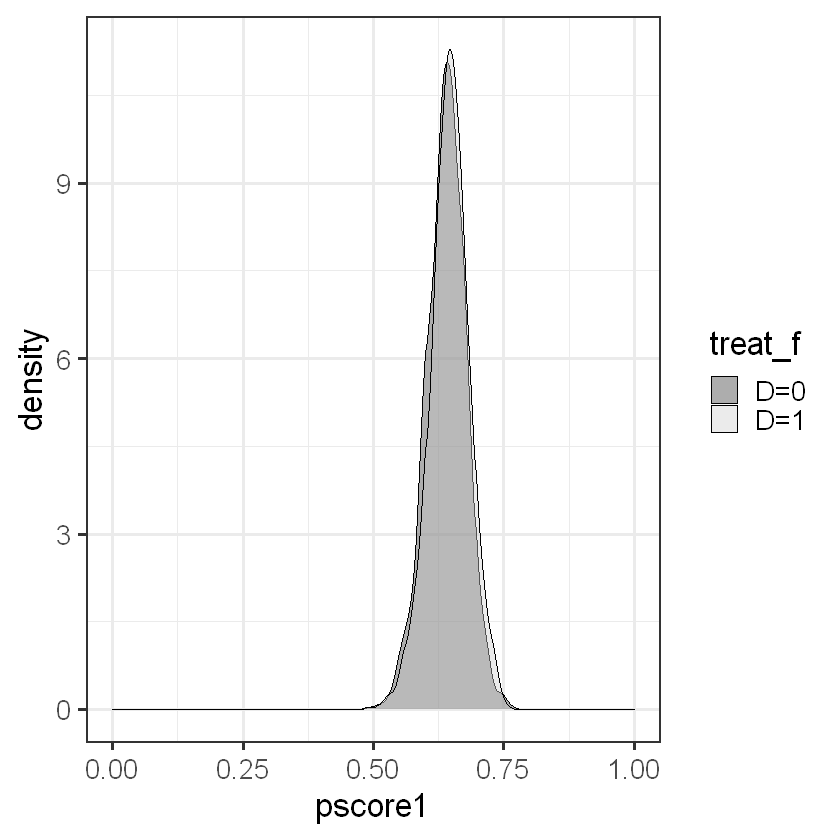

In [42]:
# 1) Estimate the  propensity score p(M,X)
    mydata <-data.frame(y,d,m,x)
    mydata$pscore1 = predict(glm(d~m+x, family=binomial(probit)), type="response" )

# 3) Check for common support in propensity score 
    # add factor variable for displaying
    mydata$treat_f <- factor(d, levels = c(0,1), label = c("D=0", "D=1")) 
    # plot separately by D
    ggplot(mydata, aes(x = pscore1, fill = treat_f)) + 
           geom_density(alpha=0.4) + scale_fill_grey() + 
          theme_bw(base_size = 20) +
          xlim(0, 1)

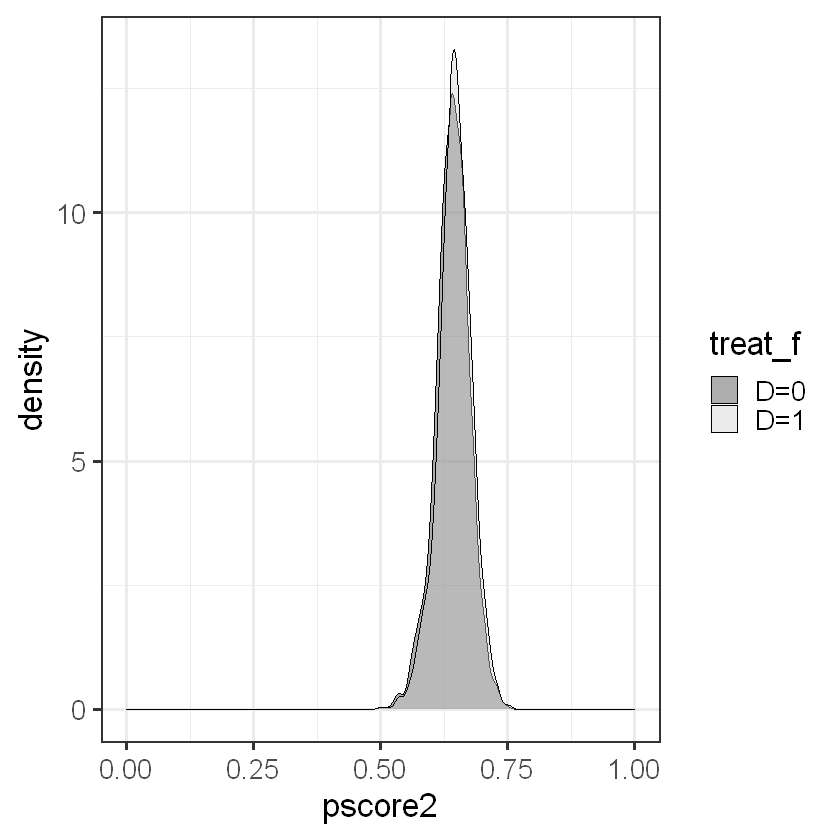

In [43]:
# 1) Estimate the  propensity score p(X)
    mydata$pscore2 = predict(glm(d~x, family=binomial(probit)), type="response" )

# 3) Check for common support in propensity score
    ggplot(mydata, aes(x = pscore2, fill = treat_f)) + 
           geom_density(alpha=0.4) + scale_fill_grey() + 
          theme_bw(base_size = 20) +
          xlim(0, 1)

Do we need to trim?

#### Applying the IPW estimator

In [44]:
#Estimate direct and indirect effect
IPW<-medweight(y=y,d=d,m=m,x=x, 
          boot=99, 
          trim = 0.05)
IPW

# Note: the package corrects for small sample imbalances

,ATE,dir.treat,dir.control,indir.treat,indir.control
effect,-0.04106079,-0.04256264,-0.04181920,0.0007584045,0.001501846
se,0.02245003,0.02258706,0.02252742,0.0009969425,0.001696575
p-value,0.06740162,0.05951343,0.06340097,0.4468180774,0.376036862


Are the effects comparable to the parametric estimators?

In [45]:
# Combine all estimators in a Table
results.all<-rbind(results.LSE, results.CDE, 
             rbind(cbind(IPW$results[1,1], IPW$results[1,2], 
                         IPW$results[1,3], IPW$results[1,4], 
                         IPW$results[1,5]),
                   cbind(IPW$results[2,1], IPW$results[2,2], 
                         IPW$results[2,3], IPW$results[2,4], 
                         IPW$results[2,5]),
                   cbind(IPW$results[3,1], IPW$results[3,2], 
                         IPW$results[3,3], IPW$results[3,4], 
                         IPW$results[3,5])) )

colnames(results.all) <- c("ATE", "de.treat", "de.control", "ie.treat", "ie.control")
rownames(results.all) <- c("effect LSE", "se.LSE", "p-val.LSE", 
                           "effect CDE", "se.CDE", "p-val.CDE",
                           "effect IPW", "se.IPW", "p-val.IPW")

print("Results based on all estimators")
xtable(results.all, digits=3)

# only estimators?

[1] "Results based on all estimators"


,ATE,de.treat,de.control,ie.treat,ie.control
effect LSE,-0.043,-0.040,-0.040,-0.003,-0.003
se.LSE,0.024,0.023,0.023,0.006,0.006
p-val.LSE,0.072,0.082,0.082,0.619,0.619
effect CDE,-0.043,-0.045,-0.039,-0.004,0.001
se.CDE,0.020,0.023,0.021,0.007,0.009
p-val.CDE,0.035,0.048,0.059,0.590,0.866
effect IPW,-0.041,-0.043,-0.042,0.001,0.002
se.IPW,0.022,0.023,0.023,0.001,0.002
p-val.IPW,0.067,0.060,0.063,0.447,0.376
